# Exercise Data Cleaning & Text Analysis



## 1. Setup
Source: https://pypi.org/project/Wikipedia-API/

In [ ]:
# Install Wikipedia API
!pip install wikipedia-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Install WorldCloud
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install eng-to-ipa
!pip install -U spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 23.5 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
pip freeze | grep -E "spacy|ipa|nltk"

en-core-web-sm @ https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.4.1/en_core_web_sm-3.4.1-py3-none-any.whl
eng-to-ipa==0.0.2
nltk==3.7
spacy==3.4.3
spacy-legacy==3.0.10
spacy-loggers==1.0.3


In [ ]:
# Import packages
import wikipediaapi
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import eng_to_ipa as ipa
import spacy
import nltk
nltk.download('punkt')
import plotly.graph_objs as go
from plotly.offline import iplot
import random
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Load the spaCy language model, and create the nlp object
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Set display option
pd.set_option('display.max_columns', 20)
pd.set_option('max_colwidth', None)

# Set preferences
sns.set(color_codes=True)

## 2. Scraping Data

After the setup the data is scraped from wikipedia in order to do later the exploratory text analyses. The analysis will be done about the descriptions of categories in wikpedia concerning whisky and rum.


### 2.1 Whisky
The first topic which will be scraped data is "Whisky". First, we have a look at different contents of the wikipedia page of "Whisky", afterwards the categories will be scraped.

In [ ]:
# Define language and page
wiki = wikipediaapi.Wikipedia('en')
page_whisky = wiki.page('Whisky')

In [ ]:
# Get title
page_whisky.title

'Whisky'

In [ ]:
# Get summary:
page_whisky.summary

'Whisky or whiskey is a type of distilled alcoholic beverage made from fermented grain mash. Various grains (which may be malted) are used for different varieties, including barley, corn, rye, and wheat. Whisky is typically aged in wooden casks, which are typically made of charred white oak. Uncharred white oak casks previously used for the aging of sherry are also sometimes used.\nWhisky is a strictly regulated spirit worldwide with many classes and types. The typical unifying characteristics of the different classes and types are the fermentation of grains, distillation, and aging in wooden barrels.'

In [ ]:
# Print sections
def print_sections(sections, level=0):
        for s in sections:
            print(level * "\t*", (s.title + ': '), s.text[0:100])
            print_sections(s.sections, level + 1)
print_sections(page_whisky.sections, level=0)


 Etymology:  The word whisky (or whiskey) is an anglicisation of the Classical Gaelic word uisce (or uisge) meani
	* Names and spellings:  Much is made of the word's two spellings: whisky and whiskey. There are two schools of thought on th
 History:  
	* Early distilling:  It is possible that distillation was practised by the Babylonians in Mesopotamia in the 2nd millenni
	* Ireland and Scotland:  The art of distillation spread to Ireland and Scotland no later than the 15th century, as did the co
	* 18th century:  In 1707, the Acts of Union merged England and Scotland, and thereafter taxes on it rose dramatically
	* 19th century:  The drinking of Scotch whisky was introduced to India in the nineteenth century. The first distiller
	* 20th century:  During the Prohibition era in the United States lasting from 1920 to 1933, all alcohol sales were ba
 Production:  
	* Distillation:  A still for making whisky is usually made of copper, since it removes sulfur-based compounds from th
	* Agin

In [ ]:
# Get categories for a page
def page_categories(page):
        categories = page.categories
        for title in sorted(categories.keys()):
            print("%s: %s" % (title, categories[title]))


print("Categories")
page_categories(page_whisky)

Categories
Category:All articles with unsourced statements: Category:All articles with unsourced statements (id: ??, ns: 14)
Category:All articles with vague or ambiguous time: Category:All articles with vague or ambiguous time (id: ??, ns: 14)
Category:Articles containing Hiberno-Scottish Gaelic-language text: Category:Articles containing Hiberno-Scottish Gaelic-language text (id: ??, ns: 14)
Category:Articles containing Irish-language text: Category:Articles containing Irish-language text (id: ??, ns: 14)
Category:Articles containing Latin-language text: Category:Articles containing Latin-language text (id: ??, ns: 14)
Category:Articles containing Old Irish (to 900)-language text: Category:Articles containing Old Irish (to 900)-language text (id: ??, ns: 14)
Category:Articles containing Scottish Gaelic-language text: Category:Articles containing Scottish Gaelic-language text (id: ??, ns: 14)
Category:Articles with BNF identifiers: Category:Articles with BNF identifiers (id: ??, ns: 1


Build a data frame for whiskies:

Link to "Whisky" category page: https://en.wikipedia.org/wiki/Category:Whisky

In [ ]:
# Get members for a category with a short description
def members_collector(category):
      mdict = {}
      categorymembers = category.categorymembers
      for c in categorymembers.values():
        if c.ns == 0:
          mdict[c.title] = c.summary
      return mdict

In [ ]:
# Collect data
whisky = wiki.page("Category:Whisky")
whisky_dict = members_collector(whisky)

In [ ]:
# Create whisky dataframe
whisky_df = pd.DataFrame([whisky_dict.keys(), whisky_dict.values()]).T
whisky_df.columns = ['Name', 'Description']
whisky_df.head(3)

,Name,Description
0,Whisky,"Whisky or whiskey is a type of distilled alcoholic beverage made from fermented grain mash. Various grains (which may be malted) are used for different varieties, including barley, corn, rye, and wheat. Whisky is typically aged in wooden casks, which are typically made of charred white oak. Uncharred white oak casks previously used for the aging of sherry are also sometimes used.\nWhisky is a strictly regulated spirit worldwide with many classes and types. The typical unifying characteristics of the different classes and types are the fermentation of grains, distillation, and aging in wooden barrels."
1,List of whisky brands,"This is a list of whisky brands arranged by country of origin and style. Whisky (or whiskey) is a type of distilled alcoholic beverage made from fermented grain mash. Different grains are used for different varieties, including barley, malted barley, rye, malted rye, wheat, and corn. Whisky is typically aged in wooden casks, made generally of charred white oak."
2,Blended whiskey,"A blended whiskey (or blended whisky) is the product of blending different types of whiskeys and sometimes also neutral grain spirits, colorings, and flavorings. It is generally the product of mixing one or more higher-quality straight or single malt whiskey with less expensive spirits and other ingredients. This typically allows for a lower priced finished product, although expensive ""premium"" varieties also exist.\nSome examples of blended whiskey include Canadian Club, Canadian Mist, Jameson Irish Whiskey, Seagram's Seven, Kessler Whiskey, Hibiki, and the various Scotch whisky blends sold under the Johnnie Walker brand, as well as Chivas Regal and SIA Scotch Whisky, other Scotch whisky blends."


In [ ]:
# explore whisky_df
whisky_df[whisky_df["Name"] == "Malt whisky"]

,Name,Description
27,Malt whisky,"Malt whisky is whisky made from a fermented mash consisting primarily of malted barley. If the product is made exclusively at a single distillery (along with other restrictions), it is typically called a single malt whisky. Although malt whisky can be made using other malted grains besides barley, those versions are not called malt whisky without specifying the grain, such as rye malt whisky or buckwheat malt whisky."


###  2.2 Rum
The second topic which will be scraped data is "Rum". The same steps as for the topic "Whisky" are conducted.

In [ ]:
# Define page
page_rum = wiki.page('Rum')

In [ ]:
# Get title
page_rum.title

'Rum'

In [ ]:
# Get summary: short description
page_rum.summary

'Rum is a liquor made by fermenting and then distilling sugarcane molasses or sugarcane juice. The distillate, a clear liquid, is usually aged in oak barrels. Rum is produced in nearly every sugar-producing region of the world, such as the Philippines, where Tanduay is the largest producer of rum globally.Rums are produced in various grades. Light rums are commonly used in cocktails, whereas "golden" and "dark" rums were typically consumed straight or neat, iced ("on the rocks"), or used for cooking, but are now commonly consumed with mixers. Premium rums are made to be consumed either straight or iced.\nRum plays a part in the culture of most islands of the West Indies as well as the Maritime provinces and Newfoundland, in Canada. The beverage has associations with the Royal Navy (where it was mixed with water or beer to make grog) and piracy (where it was consumed as bumbo). Rum has also served as a medium of economic exchange, used to help fund enterprises such as slavery (see Trian

In [ ]:
# Print sections
print_sections(page_rum.sections, level=0)
print("Categories")
page_categories(page_rum)

 Etymology:  The origin of the word "rum" is unclear. The most widely accepted hypothesis is that it is related t
 History:  
	* Precursors and Origins:  An early rum-like drink is brum, which has been produced by the Malay people for thousands of years.
	* Colonial North America:  After development of rum in the Caribbean, the drink's popularity spread to Colonial North America. 
	* Naval rum:  Rum's association with piracy began with English privateers' trading in the valuable commodity. Some
	* Colonial Australia:  Rum became an important trade good in the early period of the colony of New South Wales. The value o
	* Asia:  Commercial rum production was introduced into Taiwan along with commercial sugar production during t
 Categorization:  Dividing rum into meaningful groupings is complicated because no single standard exists for what con
	* Regional variations:  Within the Caribbean, each island or production area has a unique style. For the most part, these st
	* Grades:  The gra

In [ ]:
# collect rum data
rum = wiki.page("Category:Rums")
rum_dict = members_collector(rum)

In [ ]:
# Create rum dataframe
rum_df = pd.DataFrame([rum_dict.keys(), rum_dict.values()]).T
rum_df.columns = ['Name', 'Description']
rum_df.head(3)

,Name,Description
0,Rum,"Rum is a liquor made by fermenting and then distilling sugarcane molasses or sugarcane juice. The distillate, a clear liquid, is usually aged in oak barrels. Rum is produced in nearly every sugar-producing region of the world, such as the Philippines, where Tanduay is the largest producer of rum globally.Rums are produced in various grades. Light rums are commonly used in cocktails, whereas ""golden"" and ""dark"" rums were typically consumed straight or neat, iced (""on the rocks""), or used for cooking, but are now commonly consumed with mixers. Premium rums are made to be consumed either straight or iced.\nRum plays a part in the culture of most islands of the West Indies as well as the Maritime provinces and Newfoundland, in Canada. The beverage has associations with the Royal Navy (where it was mixed with water or beer to make grog) and piracy (where it was consumed as bumbo). Rum has also served as a medium of economic exchange, used to help fund enterprises such as slavery (see Triangular trade), organized crime, and military insurgencies (e.g., the American Revolution and Australia's Rum Rebellion)."
1,Tuzemák,"Tuzemák, formerly called Tuzemský rum (English: domestic rum), is a traditional Czech distilled beverage. It is a substitute good (ersatz) for true rum which is produced from sugarcane mainly in the Caribbean and Latin America. Since the 19th century, Tuzemák became one of the most popular spirits in the Czech lands.Tuzemský is produced from potatoes or sugar beets, diluted and flavoured by various rum essences. In the 19th century similar substitutes were produced throughout the crown lands of the Austro-Hungarian monarchy, which had no access to tropical colonies; they were named Inländer-Rum (like Stroh in Austria, today produced from sugarcane molasses and therefore a genuine spiced rum), Domači or Čajni (Croatia) etc.\nEU regulations allow the name ""rum"" to be applied only to products made from sugarcane. As a result, from 1 January 2003, this product is sold under other names like ""Tuzemák"" or ""Tuzemský""."
2,List of rum producers,Rum is distilled in a wide variety of locations by a number of different producers. Below is a list of rum distillers and brands organized by location of the distiller.


In [ ]:
# explore rum_df
rum_df[rum_df["Name"] == "Captain Morgan"]

,Name,Description
11,Captain Morgan,"Captain Morgan is a brand of flavored rums (including, in Europe, some rum-flavored ""premium spirit drinks"") produced by British alcohol conglomerate Diageo. It is named after the 17th-century Welsh privateer of the Caribbean, Sir Henry Morgan."


## 3. Data quality & Preprocessing
In this chapter the data quality (e.g. if there are missing values or distracting characters) is analysed and improved, if necessary. Furthermore the data is prepared for the exploratory data and text analyses. Among other things, additional features are created for this purpose.


### 3.1 Whisky
First, the whisky dataframe will be checked and preprocessed.

In [ ]:
# Inspect the dimensionality of the dataframe
whisky_df.shape

(49, 2)

In [ ]:
# Get information about your DataFrame, e.g data type of each column or the number of non-NaN elements.
whisky_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         49 non-null     object
 1   Description  49 non-null     object
dtypes: object(2)
memory usage: 912.0+ bytes


There a no NaN elements and only two columns we need. Therefore there is no dropping of rows and columns or imputation of values needed. There are 49 rows, the requirments are therefore just fullfilled.

In [ ]:
whisky_df.head(3)

,Name,Description
0,Whisky,"Whisky or whiskey is a type of distilled alcoholic beverage made from fermented grain mash. Various grains (which may be malted) are used for different varieties, including barley, corn, rye, and wheat. Whisky is typically aged in wooden casks, which are typically made of charred white oak. Uncharred white oak casks previously used for the aging of sherry are also sometimes used.\nWhisky is a strictly regulated spirit worldwide with many classes and types. The typical unifying characteristics of the different classes and types are the fermentation of grains, distillation, and aging in wooden barrels."
1,List of whisky brands,"This is a list of whisky brands arranged by country of origin and style. Whisky (or whiskey) is a type of distilled alcoholic beverage made from fermented grain mash. Different grains are used for different varieties, including barley, malted barley, rye, malted rye, wheat, and corn. Whisky is typically aged in wooden casks, made generally of charred white oak."
2,Blended whiskey,"A blended whiskey (or blended whisky) is the product of blending different types of whiskeys and sometimes also neutral grain spirits, colorings, and flavorings. It is generally the product of mixing one or more higher-quality straight or single malt whiskey with less expensive spirits and other ingredients. This typically allows for a lower priced finished product, although expensive ""premium"" varieties also exist.\nSome examples of blended whiskey include Canadian Club, Canadian Mist, Jameson Irish Whiskey, Seagram's Seven, Kessler Whiskey, Hibiki, and the various Scotch whisky blends sold under the Johnnie Walker brand, as well as Chivas Regal and SIA Scotch Whisky, other Scotch whisky blends."


There are some unnecessary "\n" characters and some redundant white spaces in the text, which should be deleted.

In [ ]:
# Remove redundant white spaces
def remove_redundant_whitespaces(text):
  text = re.sub(r'\s+'," ", text)
  return text.strip()

whisky_df['DescriptionPP'] = whisky_df['Description'].apply(lambda x: remove_redundant_whitespaces(x))

In [ ]:
# Remove "\n" (linebreak sign)
def remove_linebreak(text):
  text = re.sub(r'\n'," ", text)
  return text.strip()

whisky_df["DescriptionPP"] = whisky_df["DescriptionPP"].apply(lambda x: remove_linebreak(x))

In the next steps some additional features are calculated, which are later used for the exploratory data and text analysis.

In [ ]:
# Add "Description without stop words and punctuation"

# List of Stop words
stopwords = nlp.Defaults.stop_words

def remove_stop_words_and_punctuation(text):
  doc = nlp(text)

  # Remove Stop words
  sentence_wo_stops = []

  for token in doc:
    if token.text in stopwords:
      continue
    else:
      sentence_wo_stops.append(token.text)

  new_text = " ".join(sentence_wo_stops)

  # Remove punctation
  new_text = re.sub(r'[^\w\s]', '', new_text)

  # Return list of tokens
  return new_text

whisky_df["Description_wo_sw_punct"] = whisky_df["DescriptionPP"].apply(lambda x: remove_stop_words_and_punctuation(x))

In [ ]:
# Add "Tokens" and "Tokens without stopwords and punctuation"
def text_tokens(text, column):
  return nltk.word_tokenize(text[column])

whisky_df["Tokens"] = whisky_df.apply(lambda x: text_tokens(x, "DescriptionPP"), axis=1)
whisky_df["Tokens_wo_sw_punct"] = whisky_df.apply(lambda x: text_tokens(x, "Description_wo_sw_punct"), axis=1)

In [ ]:
# Add 'Description lenght' with and without stopwords
whisky_df['DescriptionLenght'] = whisky_df['DescriptionPP'].astype(str).apply(len)
whisky_df['DescriptionLenght_wo_sw_punct'] = whisky_df['Description_wo_sw_punct'].astype(str).apply(len)

In [ ]:
# Add tokens count with and without stopwords
whisky_df['TokenNumber_WSw'] = whisky_df['Tokens'].apply(lambda x: len(str(x).split()))
whisky_df['TokenNumber_WoSw'] = whisky_df['Tokens_wo_sw_punct'].apply(lambda x: len(str(x).split()))

In [ ]:
# Add number of tokens which are stopwords or punctuation
whisky_df['TokenNumber_sw_and_punct'] = whisky_df['TokenNumber_WSw'] - whisky_df['TokenNumber_WoSw']

In [ ]:
# Add polarity with and without stopwords
whisky_df['Polarity_WSw'] = whisky_df['Description'].map(lambda text: TextBlob(str(text)).sentiment.polarity)
whisky_df['Polarity_WoSw'] = whisky_df['Description_wo_sw_punct'].map(lambda text: TextBlob(str(text)).sentiment.polarity)

In [ ]:
# Add difference of polarity with and without stopwords
whisky_df['Difference_Polarity'] = whisky_df['Polarity_WSw'] - whisky_df['Polarity_WoSw']

In [ ]:
# Add "Type-Token Ratio (TTR)"
def ttr(tokens):
  return len(set(tokens))/len(tokens)

whisky_df["TTR_WSw"] = whisky_df["Tokens"].apply(lambda x: ttr(x))
whisky_df["TTR_WoSw"] = whisky_df["Tokens_wo_sw_punct"].apply(lambda x: ttr(x))

In [ ]:
#Add "Part-of-Speech (POS)"
def pos_sequence(text):
  doc = nlp(text)
  new_doc = []
  for token in doc:
    new_doc.append((token, token.pos_))
  return new_doc

whisky_df['POS'] = whisky_df['DescriptionPP'].apply(lambda x: pos_sequence(x))

In [ ]:
# Overview of the first rows with the new columns
whisky_df.head(3)

,Name,Description
0,Whisky,"Whisky or whiskey is a type of distilled alcoholic beverage made from fermented grain mash. Various grains (which may be malted) are used for different varieties, including barley, corn, rye, and wheat. Whisky is typically aged in wooden casks, which are typically made of charred white oak. Uncharred white oak casks previously used for the aging of sherry are also sometimes used.\nWhisky is a strictly regulated spirit worldwide with many classes and types. The typical unifying characteristics of the different classes and types are the fermentation of grains, distillation, and aging in wooden barrels."
1,List of whisky brands,"This is a list of whisky brands arranged by country of origin and style. Whisky (or whiskey) is a type of distilled alcoholic beverage made from fermented grain mash. Different grains are used for different varieties, including barley, malted barley, rye, malted rye, wheat, and corn. Whisky is typically aged in wooden casks, made generally of charred white oak."
2,Blended whiskey,"A blended whiskey (or blended whisky) is the product of blending different types of whiskeys and sometimes also neutral grain spirits, colorings, and flavorings. It is generally the product of mixing one or more higher-quality straight or single malt whiskey with less expensive spirits and other ingredients. This typically allows for a lower priced finished product, although expensive ""premium"" varieties also exist.\nSome examples of blended whiskey include Canadian Club, Canadian Mist, Jameson Irish Whiskey, Seagram's Seven, Kessler Whiskey, Hibiki, and the various Scotch whisky blends sold under the Johnnie Walker brand, as well as Chivas Regal and SIA Scotch Whisky, other Scotch whisky blends."


### 3.2 Rum
The same steps as for the topic "Whisky" are conducted.

In [ ]:
# Inspect the dimensionality of the dataframe
rum_df.shape

(72, 2)

In [ ]:
# Get information about your DataFrame, e.g data type of each column or the number of non-NaN elements.
rum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         72 non-null     object
 1   Description  72 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


There a no NaN elements and only two columns we need. Therefore there is no dropping of rows and columns or imputation of values needed. There are 72 rows, the requirments are therefore fullfilled.

In [ ]:
rum_df.head(3)

,Name,Description
0,Rum,"Rum is a liquor made by fermenting and then distilling sugarcane molasses or sugarcane juice. The distillate, a clear liquid, is usually aged in oak barrels. Rum is produced in nearly every sugar-producing region of the world, such as the Philippines, where Tanduay is the largest producer of rum globally.Rums are produced in various grades. Light rums are commonly used in cocktails, whereas ""golden"" and ""dark"" rums were typically consumed straight or neat, iced (""on the rocks""), or used for cooking, but are now commonly consumed with mixers. Premium rums are made to be consumed either straight or iced.\nRum plays a part in the culture of most islands of the West Indies as well as the Maritime provinces and Newfoundland, in Canada. The beverage has associations with the Royal Navy (where it was mixed with water or beer to make grog) and piracy (where it was consumed as bumbo). Rum has also served as a medium of economic exchange, used to help fund enterprises such as slavery (see Triangular trade), organized crime, and military insurgencies (e.g., the American Revolution and Australia's Rum Rebellion)."
1,Tuzemák,"Tuzemák, formerly called Tuzemský rum (English: domestic rum), is a traditional Czech distilled beverage. It is a substitute good (ersatz) for true rum which is produced from sugarcane mainly in the Caribbean and Latin America. Since the 19th century, Tuzemák became one of the most popular spirits in the Czech lands.Tuzemský is produced from potatoes or sugar beets, diluted and flavoured by various rum essences. In the 19th century similar substitutes were produced throughout the crown lands of the Austro-Hungarian monarchy, which had no access to tropical colonies; they were named Inländer-Rum (like Stroh in Austria, today produced from sugarcane molasses and therefore a genuine spiced rum), Domači or Čajni (Croatia) etc.\nEU regulations allow the name ""rum"" to be applied only to products made from sugarcane. As a result, from 1 January 2003, this product is sold under other names like ""Tuzemák"" or ""Tuzemský""."
2,List of rum producers,Rum is distilled in a wide variety of locations by a number of different producers. Below is a list of rum distillers and brands organized by location of the distiller.


As in the whisky dataframe, there are some unnecessary "\n" characters and some redundant white spaces in the text, which should be deleted.

In [ ]:
# Remove redundant white spaces
def remove_redundant_whitespaces(text):
  text = re.sub(r'\s+'," ", text)
  return text.strip()

rum_df["DescriptionPP"] = rum_df["Description"].apply(lambda x: remove_redundant_whitespaces(x))

In [ ]:
# Remove "\n" (linebreak sign)
def remove_linebreak(text):
  text = re.sub(r'\n'," ", text)
  return text.strip()

rum_df["DescriptionPP"] = rum_df["DescriptionPP"].apply(lambda x: remove_linebreak(x))

In the next steps the same additional features as in the whisky dataframe are calculated , which are later used for the exploratory text analysis.

In [ ]:
# Add "Description without stop words and punctuation"

# List of Stop words
stopwords = nlp.Defaults.stop_words

def remove_stop_words_and_punctuation(text):
  doc = nlp(text)

  # Remove Stop words
  sentence_wo_stops = []

  for token in doc:
    if token.text in stopwords:
      continue
    else:
      sentence_wo_stops.append(token.text)

  new_text = " ".join(sentence_wo_stops)

  # Remove punctation
  new_text = re.sub(r'[^\w\s]', '', new_text)

  # Return list of tokens
  return new_text

rum_df["Description_wo_sw_punct"] = rum_df["DescriptionPP"].apply(lambda x: remove_stop_words_and_punctuation(x))

In [ ]:
# Add "Tokens" and "Tokens without stopwords and punctuation"
def text_tokens(text, column):
  return nltk.word_tokenize(text[column])

rum_df["Tokens"] = rum_df.apply(lambda x: text_tokens(x, "DescriptionPP"), axis=1)
rum_df["Tokens_wo_sw_punct"] = rum_df.apply(lambda x: text_tokens(x, "Description_wo_sw_punct"), axis=1)

In [ ]:
# Add 'Description lenght' with and without stopwords
rum_df['DescriptionLenght'] = rum_df['DescriptionPP'].astype(str).apply(len)
rum_df['DescriptionLenght_wo_sw_punct'] = rum_df['Description_wo_sw_punct'].astype(str).apply(len)

In [ ]:
# Add tokens count with and without stopwords
rum_df['TokenNumber_WSw'] = rum_df['Tokens'].apply(lambda x: len(str(x).split()))
rum_df['TokenNumber_WoSw'] = rum_df['Tokens_wo_sw_punct'].apply(lambda x: len(str(x).split()))

In [ ]:
# Add number of tokens which are stopwords or punctuation
rum_df['TokenNumber_sw_and_punct'] = rum_df['TokenNumber_WSw'] - rum_df['TokenNumber_WoSw']

In [ ]:
# Add polarity with and without stopwords
rum_df['Polarity_WSw'] = rum_df['Description'].map(lambda text: TextBlob(str(text)).sentiment.polarity)
rum_df['Polarity_WoSw'] = rum_df['Description_wo_sw_punct'].map(lambda text: TextBlob(str(text)).sentiment.polarity)

In [ ]:
# Add difference of polarity with and without stopwords
rum_df['Difference_Polarity'] = rum_df['Polarity_WSw'] - whisky_df['Polarity_WoSw']

In [ ]:
# Add "Type-Token Ratio (TTR)"
def ttr(tokens):
  return len(set(tokens))/len(tokens)

rum_df["TTR_WSw"] = rum_df["Tokens"].apply(lambda x: ttr(x))
rum_df["TTR_WoSw"] = rum_df["Tokens_wo_sw_punct"].apply(lambda x: ttr(x))

In [ ]:
#Add "Part-of-Speech (POS)"
def pos_sequence(text):
  doc = nlp(text)
  new_doc = []
  for token in doc:
    new_doc.append((token, token.pos_))
  return new_doc

rum_df['POS'] = rum_df['DescriptionPP'].apply(lambda x: pos_sequence(x))

In [ ]:
# Overview of the first rows with the new columns
rum_df.head(3)

,Name,Description,DescriptionPP,Description_wo_sw_punct,Tokens,Tokens_wo_sw_punct,DescriptionLenght,DescriptionLenght_wo_sw_punct,TokenNumber_WSw,TokenNumber_WoSw,TokenNumber_sw_and_punct,Polarity_WSw,Polarity_WoSw,Difference_Polarity,TTR_WSw,TTR_WoSw,POS
0,Rum,"Rum is a liquor made by fermenting and then distilling sugarcane molasses or sugarcane juice. The distillate, a clear liquid, is usually aged in oak barrels. Rum is produced in nearly every sugar-producing region of the world, such as the Philippines, where Tanduay is the largest producer of rum globally.Rums are produced in various grades. Light rums are commonly used in cocktails, whereas ""golden"" and ""dark"" rums were typically consumed straight or neat, iced (""on the rocks""), or used for cooking, but are now commonly consumed with mixers. Premium rums are made to be consumed either straight or iced.\nRum plays a part in the culture of most islands of the West Indies as well as the Maritime provinces and Newfoundland, in Canada. The beverage has associations with the Royal Navy (where it was mixed with water or beer to make grog) and piracy (where it was consumed as bumbo). Rum has also served as a medium of economic exchange, used to help fund enterprises such as slavery (see Triangular trade), organized crime, and military insurgencies (e.g., the American Revolution and Australia's Rum Rebellion).","Rum is a liquor made by fermenting and then distilling sugarcane molasses or sugarcane juice. The distillate, a clear liquid, is usually aged in oak barrels. Rum is produced in nearly every sugar-producing region of the world, such as the Philippines, where Tanduay is the largest producer of rum globally.Rums are produced in various grades. Light rums are commonly used in cocktails, whereas ""golden"" and ""dark"" rums were typically consumed straight or neat, iced (""on the rocks""), or used for cooking, but are now commonly consumed with mixers. Premium rums are made to be consumed either straight or iced. Rum plays a part in the culture of most islands of the West Indies as well as the Maritime provinces and Newfoundland, in Canada. The beverage has associations with the Royal Navy (where it was mixed with water or beer to make grog) and piracy (where it was consumed as bumbo). Rum has also served as a medium of economic exchange, used to help fund enterprises such as slavery (see Triangular trade), organized crime, and military insurgencies (e.g., the American Revolution and Australia's Rum Rebellion).",Rum liquor fermenting distilling sugarcane molasses sugarcane juice The distillate clear liquid usually aged oak barrels Rum produced nearly sugar producing region world Philippines Tanduay largest producer rum globally Rums produced grades Light rums commonly cocktails golden dark rums typically consumed straight neat iced rocks cooking commonly consumed mixers Premium rums consumed straight iced Rum plays culture islands West Indies Maritime provinces Newfoundland Canada The beverage associations Royal Navy mixed water beer grog piracy consumed bumbo Rum served medium economic exchange help fund enterprises slavery Triangular trade organized crime military insurgencies eg American Revolution Australia Rum Rebellion,"[Rum, is, a, liquor, made, by, fermenting, and, then, distilling, sugarcane, molasses, or, sugarcane, juice, ., The, distillate, ,, a, clear, liquid, ,, is, usually, aged, in, oak, barrels, ., Rum, is, produced, in, nearly, every, sugar-producing, region, of, the, world, ,, such, as, the, Philippines, ,, where, Tanduay, is, the, largest, producer, of, rum, globally.Rums, are, produced, in, various, grades, ., Light, rums, are, commonly, used, in, cocktails, ,, whereas, ``, golden, '', and, ``, dark, '', rums, were, typically, consumed, straight, or, neat, ,, iced, (, ``, on, the, rocks, '', ), ,, or, used, for, cooking, ,, ...]","[Rum, liquor, fermenting, distilling, sugarcane, molasses, sugarcane, juice, The, distillate, clear, liquid, usually, a

## 4. Exploratory Data or Text Analysis (EDA/ETA)
By means of the exploratory data and text analysis we get to know the data. It provides a basis for further tasks, e.g. modelling. Typically, descriptive statistics and visualizations are used.

### 4.1 Overview
First, some simple descriptive statistics.

In [ ]:
whisky_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name                           49 non-null     object 
 1   Description                    49 non-null     object 
 2   DescriptionPP                  49 non-null     object 
 3   Description_wo_sw_punct        49 non-null     object 
 4   Tokens                         49 non-null     object 
 5   Tokens_wo_sw_punct             49 non-null     object 
 6   DescriptionLenght              49 non-null     int64  
 7   DescriptionLenght_wo_sw_punct  49 non-null     int64  
 8   TokenNumber_WSw                49 non-null     int64  
 9   TokenNumber_WoSw               49 non-null     int64  
 10  TokenNumber_sw_and_punct       49 non-null     int64  
 11  Polarity_WSw                   49 non-null     float64
 12  Polarity_WoSw                  49 non-null     float

In [ ]:
rum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name                           72 non-null     object 
 1   Description                    72 non-null     object 
 2   DescriptionPP                  72 non-null     object 
 3   Description_wo_sw_punct        72 non-null     object 
 4   Tokens                         72 non-null     object 
 5   Tokens_wo_sw_punct             72 non-null     object 
 6   DescriptionLenght              72 non-null     int64  
 7   DescriptionLenght_wo_sw_punct  72 non-null     int64  
 8   TokenNumber_WSw                72 non-null     int64  
 9   TokenNumber_WoSw               72 non-null     int64  
 10  TokenNumber_sw_and_punct       72 non-null     int64  
 11  Polarity_WSw                   72 non-null     float64
 12  Polarity_WoSw                  72 non-null     float

In [ ]:
# Descriptive statistics of the whisky dataframe
whisky_df.describe()

,DescriptionLenght,DescriptionLenght_wo_sw_punct,TokenNumber_WSw,TokenNumber_WoSw,TokenNumber_sw_and_punct,Polarity_WSw,Polarity_WoSw,Difference_Polarity,TTR_WSw,TTR_WoSw
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,733.836735,535.897959,136.693878,70.285714,66.408163,0.033198,0.018314,0.014884,0.658726,0.810018
std,486.437275,346.862620,90.755901,45.635786,46.100397,0.128672,0.136248,0.048244,0.112030,0.093051
min,86.000000,54.000000,17.000000,9.000000,7.000000,-0.300000,-0.400000,-0.077778,0.446154,0.603306
25%,344.000000,276.000000,69.000000,36.000000,33.000000,-0.030952,-0.060992,0.000000,0.592233,0.759036
50%,617.000000,446.000000,119.000000,56.000000,54.000000,0.015668,0.001852,0.000742,0.633803,0.805310
75%,1087.000000,770.000000,211.000000,103.000000,104.000000,0.079902,0.076557,0.032251,0.725490,0.865979
max,2471.000000,1790.000000,455.000000,240.000000,215.000000,0.479167,0.416667,0.203714,1.000000,1.000000


In [ ]:
# Descriptive statistics of the rum dataframe
rum_df.describe()

,DescriptionLenght,DescriptionLenght_wo_sw_punct,TokenNumber_WSw,TokenNumber_WoSw,TokenNumber_sw_and_punct,Polarity_WSw,Polarity_WoSw,Difference_Polarity,TTR_WSw,TTR_WoSw
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,49.000000,72.000000,72.000000
mean,498.263889,372.597222,94.694444,50.486111,44.208333,0.064990,0.062065,0.044704,0.727208,0.847134
std,417.097347,303.045140,79.112086,40.589318,39.285857,0.121969,0.128045,0.165282,0.131637,0.098836
min,41.000000,28.000000,9.000000,4.000000,5.000000,-0.400000,-0.400000,-0.541667,0.513043,0.676923
25%,198.500000,155.500000,39.500000,21.750000,17.000000,0.000000,0.000000,-0.016558,0.628419,0.785200
50%,367.500000,288.000000,69.000000,37.500000,28.000000,0.061250,0.033856,0.060992,0.704918,0.833333
75%,661.000000,489.500000,124.500000,64.250000,61.000000,0.126723,0.121250,0.166667,0.838905,0.929739
max,1979.000000,1513.000000,383.000000,214.000000,175.000000,0.382143,0.400000,0.275000,1.000000,1.000000


**First insights and assumptions**:
- The types of columns seems to be correct.
- There are no NaN-values.
- More rows (categories) for rum (72 vs. 49).
- The description for whisky categories seems to be longer as they for rum categories (with and without stopwords).
- The description for whisky categories have more stopwords and punctuation in it. Probably this have an interaction with the lenght of the description (see above).
- The polarity for both whisky and rum descriptions are close to 0. The polarity for rum seems to be slighty more positiv.
- The difference of polarity between descriptions with and without stopwords and punctuation seems to be very small.
-  The Type-Token Ratio (TTR) for rum category description seems to be higher than the TTR for whisky descriptions. Probably this have an interaction with the lenght of the description (see above).
-  The Type-Token Ratio (TTR) without stopwords seems to be higher than the TTR of descriptions with stopwords and punctuation. This is plausible, because the stopwords and punctuation tokens are often frequent in textes, which could cause a lower TTR ratio.



### 4.2 Wordcloud
A word Cloud shows the frequency or importance of the words in a text. More frequent/important words a written bigger and therefore better visible.

In [ ]:
# Get all description with and without stopwords
all_des_whisky = whisky_df['DescriptionPP']
print(all_des_whisky[-1:])

all_des_whisky_wosw = whisky_df['Description_wo_sw_punct']
print(all_des_whisky_wosw[-1:])

all_des_rum = rum_df['DescriptionPP']
print(all_des_rum[-1:])

all_des_rum_wosw = rum_df['Description_wo_sw_punct']
print(all_des_rum_wosw[-1:])


48    World Whisky Day was founded in 2012 and falls on the third Saturday of May each year.
Name: DescriptionPP, dtype: object
48    World Whisky Day founded 2012 falls Saturday May year 
Name: Description_wo_sw_punct, dtype: object
71    Venezuelan rum (Spanish: Ron de Venezuela) is a protected designation of origin, granted by the SAPI since 2003, to the rum brands of Venezuela that meet certain quality and origin requirements.
Name: DescriptionPP, dtype: object
71    Venezuelan rum  Spanish  Ron de Venezuela  protected designation origin  granted SAPI 2003  rum brands Venezuela meet certain quality origin requirements 
Name: Description_wo_sw_punct, dtype: object


In [ ]:
# Concatenate strings in the Series/Index with cat() function to have all descriptions as a string
whisky = all_des_whisky.str.cat()
whisky_wosw = all_des_whisky_wosw.str.cat()
rum = all_des_rum.str.cat()
rum_wosw = all_des_rum_wosw.str.cat()

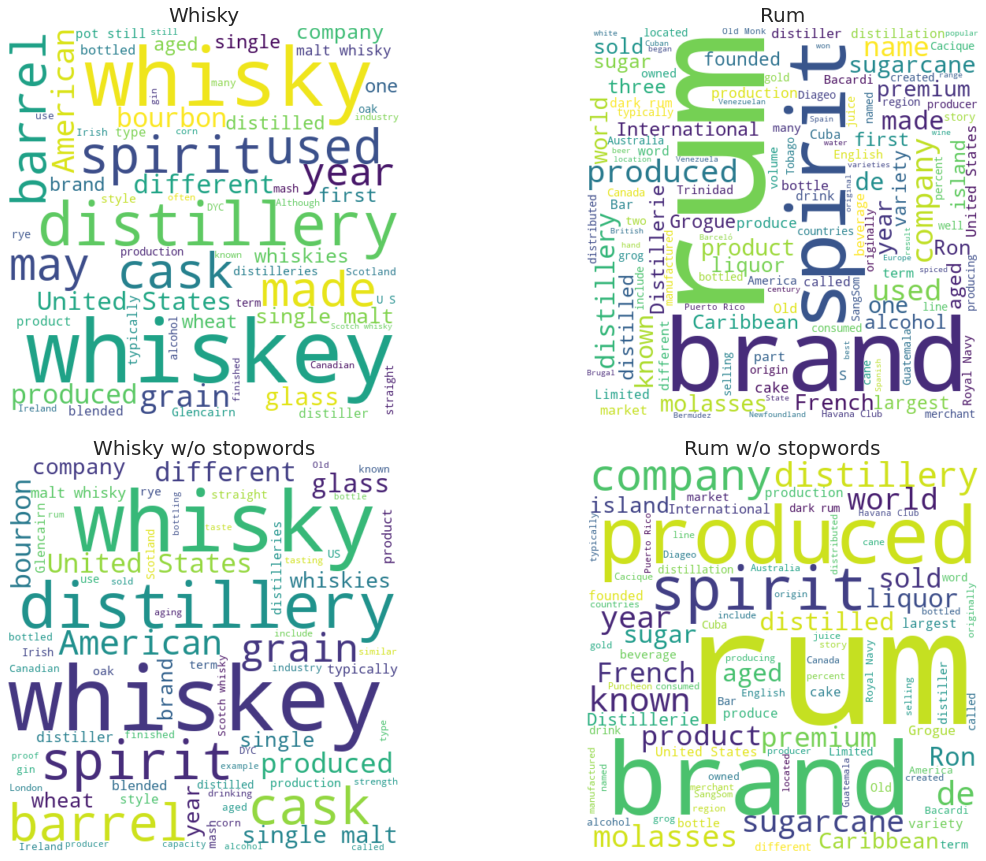

In [ ]:
# Word clouds for rum and whisky descriptions with and without stopwords
random.seed(7)

figure, axes = plt.subplots(2, 2, figsize=(18, 14))
cluster_groups = [whisky,rum, whisky_wosw,rum_wosw,]
cluster_titles = ['Whisky', 'Rum', 'Whisky w/o stopwords', 'Rum w/o stopwords']
i = 0
for r in range(2):
    for c in range(2):
        df_cluster = cluster_groups[i]
        wordcloud_image = WordCloud(width = 500, height = 500,
                background_color ='white',
                min_font_size = 10).generate(df_cluster)
        ax = axes[r][c]
        ax.imshow(wordcloud_image,
                  interpolation="bilinear")
        ax.set_title(cluster_titles[i], fontsize=20)
        ax.set_xticks([])
        ax.set_yticks([])
        i = i + 1

plt.subplots_adjust(left=0.07, right=0.93, wspace=0.08, hspace=0.1,top=0.9,bottom=0.08)
#plt.tight_layout()
plt.show()

**Insights**
- The name of the spirits are the most frequent words. This is not surprising.
- There are two different spellings for whisky: "Whiskey", often used for irish and american whiskeys, "Whisky" often used for scottish and canadien whisky. Both words are very frequent/important.
- For both spirits the producer "(brand"/"company" for rum, "distellery" for whisky) seems to be important.
- In the whisky production process it is very important in which type of cask/barrel the spirit is aged. This is visible in the wordcloud because these two words are both written quit big.
- There is not a big difference between the wordclouds with or without stopwords. The words "made" and "used" are very frequent, but besides this, the important conclusions you see in both wordclouds.

### 4.3 Unigrams & Bigrams
#### Unigrams
Next we will analyse, if the words, which are highlighted in the wordcloud, are actually the most frequent ones.

Text(0.5, 1.0, 'Unigrams rum w/o stopwords')

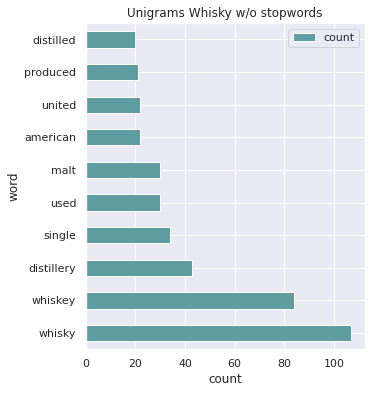

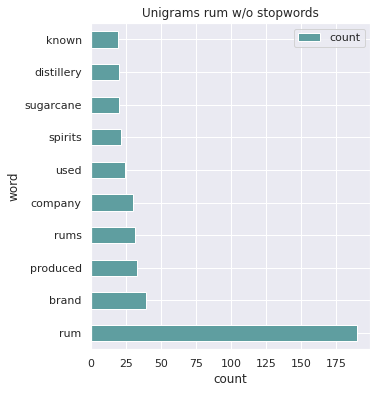

In [ ]:
# define function
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# whisky
top_words_whisky = get_top_n_words(whisky_df['DescriptionPP'], 10)

unigrams_top_words_whisky = pd.DataFrame(top_words_whisky, columns = ['word' , 'count'])

unigrams_top_words_whisky.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Unigrams Whisky w/o stopwords')

# rum
top_words_rum = get_top_n_words(rum_df['DescriptionPP'], 10)

unigrams_top_words_rum = pd.DataFrame(top_words_rum, columns = ['word' , 'count'])

unigrams_top_words_rum.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Unigrams rum w/o stopwords')

**Insights**
- Most of the most highlighted words in the wordcloud are as well in the top 10 of the most frequent words.
- But there are some exceptions. For example "barrel", "cask" and "grain" are marked as important in the wordcloud, but they are no in the top 10 of the most frequent words.
-Another difference is the word "rums" which is very frequent, but not noticeable in the wordcloud.

#### Bigrams
In addition the most frequent bigrams are analysed.

Text(0.5, 1.0, 'Bigrams rum w/o stopwords')

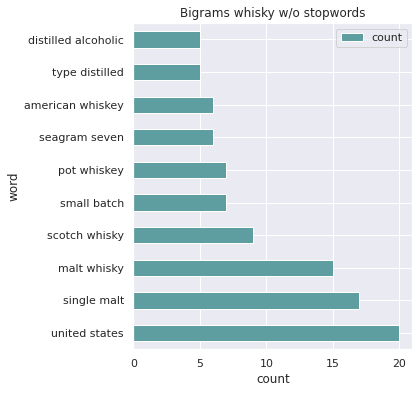

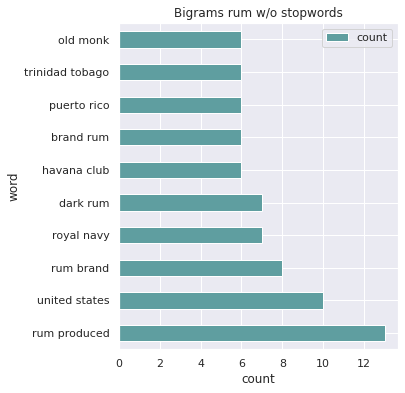

In [ ]:
# define function
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# whisky
top_bigrams_whisky = get_top_n_bigram(whisky_df['DescriptionPP'], 10)

bigrams_top_words_whisky = pd.DataFrame(top_bigrams_whisky, columns = ['word' , 'count'])

bigrams_top_words_whisky.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Bigrams whisky w/o stopwords')

# rum
top_bigrams_rum = get_top_n_bigram(rum_df['DescriptionPP'], 10)

bigrams_top_words_rum = pd.DataFrame(top_bigrams_rum, columns = ['word' , 'count'])

bigrams_top_words_rum.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Bigrams rum w/o stopwords')

**Insights**
- The most frequent bigrams are often origins (e.g. "united states") or types or brands of the spirits (e.g. "dark rum", "single malt").
- These results seems to be plausible.

### 4.4 Polarity
In this chapter the polarity of the description is analysed.
First, the polarity of the whisky and the rum descriptions is compared.

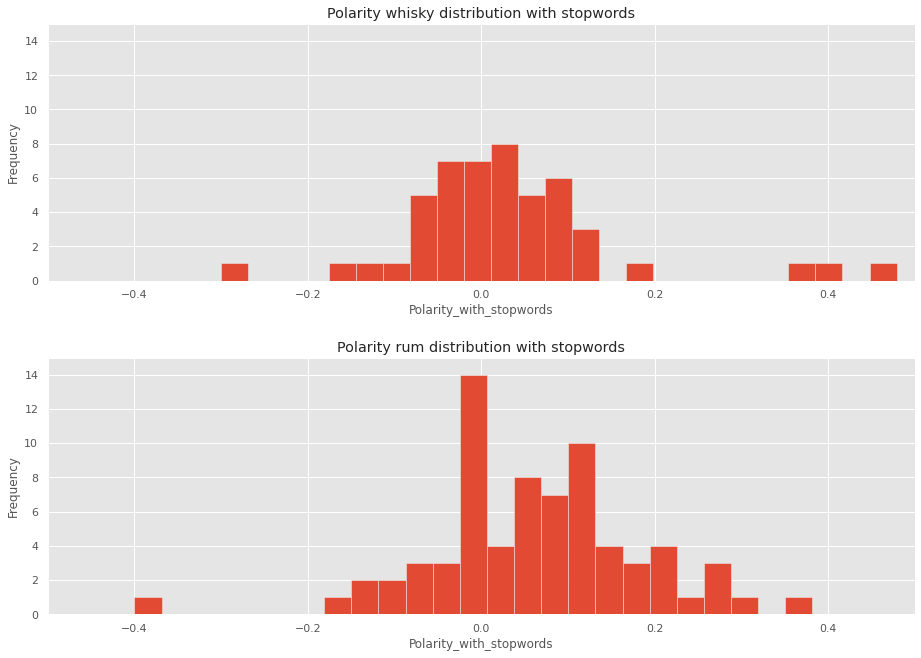

In [ ]:
# Histogram of polarity sentiment score

figure, axes = plt.subplots(2, 1, figsize=(14, 10))

# whisky
plt.style.use('ggplot')
plt.subplot(211)
whisky_df['Polarity_WSw'].plot(kind='hist', bins=25)
plt.xlim(xmin=-0.5, xmax = 0.5)
plt.ylim(ymin=0, ymax = 15)
plt.xlabel('Polarity_with_stopwords')
plt.title('Whisky polarity distribution with stopwords')

# rum
plt.style.use('ggplot')
plt.subplot(212)
rum_df['Polarity_WSw'].plot(kind='hist', bins=25)
plt.xlim(xmin=-0.5, xmax = 0.5)
plt.ylim(ymin=0, ymax = 15)
plt.xlabel('Polarity_with_stopwords')
plt.title('Rum polarity  distribution with stopwords')

plt.subplots_adjust(left=0.07, right=0.93, wspace=0.08, hspace=0.3,top=0.9,bottom=0.08)
plt.show()

In [ ]:
# Boxplot of polarity sentiment score
y0 = whisky_df['Polarity_WSw']
y1 = rum_df['Polarity_WSw']

trace0 = go.Box(
    y=y0,
    name = 'Whisky',
    marker = dict(
        color = 'rgb(214, 12, 140)',))
trace1 = go.Box(
    y=y1,
    name = 'Rum',
    marker = dict(
        color = 'rgb(0, 128, 128)',))

data = [trace0, trace1]
layout = go.Layout(
    title = "Polarity with stopwords",
    autosize=False,
    width=600,
    height=600
)

fig = go.Figure(data=data,layout=layout)
fig.show(renderer="colab")

In a second step the difference between the polarity with and without stopwords and punctuation is analysed.

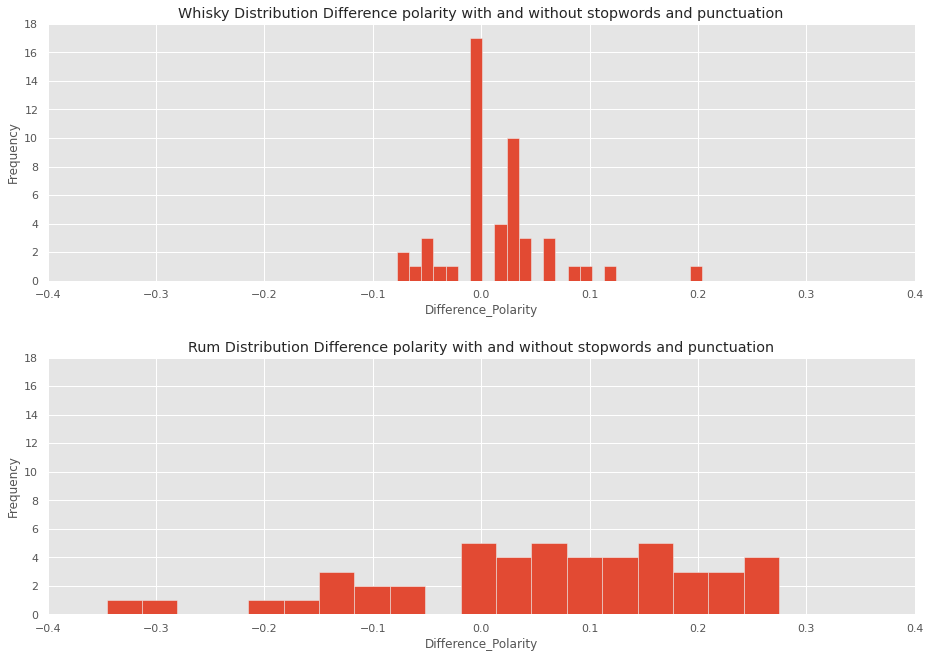

In [ ]:
# Histogram of difference between the polarity with and without stopwords and punctuation

figure, axes = plt.subplots(2, 1, figsize=(14, 10))

# whisky
plt.style.use('ggplot')
plt.subplot(211)
whisky_df['Difference_Polarity'].plot(kind='hist', bins=25)
plt.xlim(xmin=-0.4, xmax = 0.4)
plt.ylim(ymin=0, ymax = 18)
plt.xlabel('Difference_Polarity')
plt.title('Whisky Distribution Difference polarity with and without stopwords and punctuation')


# rum
plt.style.use('ggplot')
plt.subplot(212)
rum_df['Difference_Polarity'].plot(kind='hist', bins=25)
plt.xlim(xmin=-0.4, xmax = 0.4)
plt.ylim(ymin=0, ymax = 18)
plt.xlabel('Difference_Polarity')
plt.title('Rum Distribution Difference polarity with and without stopwords and punctuation')

plt.subplots_adjust(left=0.07, right=0.93, wspace=0.08, hspace=0.3,top=0.9,bottom=0.08)
plt.show()

In [ ]:
# Boxplot of difference between the polarity with and without stopwords and punctuation
y0 = whisky_df['Difference_Polarity']
y1 = rum_df['Difference_Polarity']

trace0 = go.Box(
    y=y0,
    name = 'Whisky',
    marker = dict(
        color = 'rgb(214, 12, 140)',))
trace1 = go.Box(
    y=y1,
    name = 'Rum',
    marker = dict(
        color = 'rgb(0, 128, 128)',))

data = [trace0, trace1]
layout = go.Layout(
    title = "Polarity with stopwords",
    autosize=False,
    width=600,
    height=600
)

fig = go.Figure(data=data,layout=layout)
fig.show(renderer="colab")

**Insights**
- The histograms and the boxplots support the first assumptions, that the polarity for both whisky and rum descriptions are close to 0 and that the polarity for rum seems to be slighty more positiv.
- The difference of polarity between descriptions with and without stopwords and punctuation is in most cases very small.
- The spread of difference is for the rum description wider.
- The difference is often positive, this means that the polarity is higher in the descriptions with stopwords.

### 4.5 Description lenght
In this chapter the lenght of the description is analysed.


In [ ]:
# Boxplot of description lenght
y0 = whisky_df['DescriptionLenght']
y1 = rum_df['DescriptionLenght']
y2 = whisky_df['DescriptionLenght_wo_sw_punct']
y3 = rum_df['DescriptionLenght_wo_sw_punct']

trace0 = go.Box(
    y=y0,
    name = 'Whisky with stopwords',
    marker = dict(
        color = 'rgb(214, 12, 140)',))
trace1 = go.Box(
    y=y1,
    name = 'Rum with stopwords',
    marker = dict(
        color = 'rgb(0, 128, 128)',))

trace2 = go.Box(
    y=y2,
    name = 'Whisky without stopwords',
    marker = dict(
        color = 'rgb(10, 140, 208)',))

trace3 = go.Box(
    y=y3,
    name = 'Rum without stopwords',
    marker = dict(
        color = 'rgb(12, 102, 14)',))


data = [trace0, trace1,trace2,trace3 ]
layout = go.Layout(
    title = "Description lenght",
    autosize=False,
    width=1000,
    height=600
)

fig = go.Figure(data=data,layout=layout)
fig.show(renderer="colab")

**Insights**
- The boxplots above support the assumption, that the whisky description are longer (with and without stopwords).
- In addition, the lenght of the description varies more for the whisky descriptions.

### 4.6 Type-Token Ratio (TTR)
In this chapter the Type-Token Ratio (TTR) is analysed. TTR is a measure of complexity and shows the lexical richness, or variety in vocabulary of texts.

First, the TTR of the descriptions of whisky and rum are compared.

In [ ]:
# Boxplot of TTR (with stopword)
y0 = whisky_df['TTR_WSw']
y1 = rum_df['TTR_WSw']

trace0 = go.Box(
    y=y0,
    name = 'Whisky',
    marker = dict(
        color = 'rgb(214, 12, 140)',))
trace1 = go.Box(
    y=y1,
    name = 'Rum',
    marker = dict(
        color = 'rgb(0, 128, 128)',))

data = [trace0, trace1]
layout = go.Layout(
    title = "TTR with stopwords",
    autosize=False,
    width=600,
    height=600
)

fig = go.Figure(data=data,layout=layout)
fig.show(renderer="colab")

In a second step it is checked, if there dependece between the lenght of description and the TTR.

Text(0, 0.5, 'TTR')

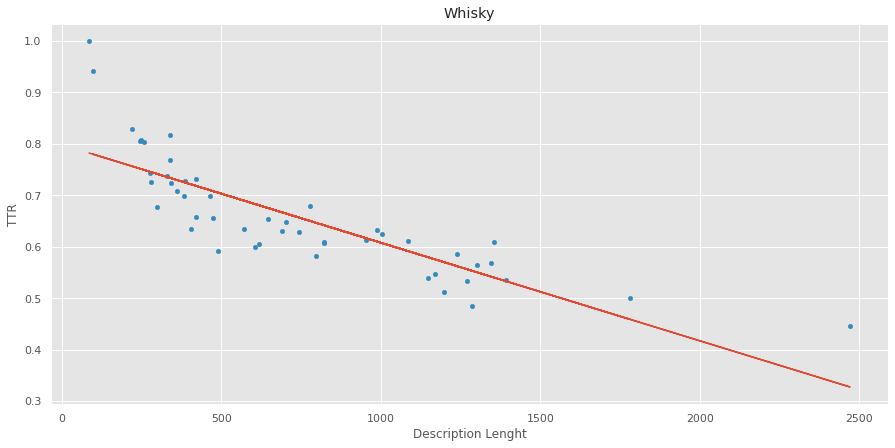

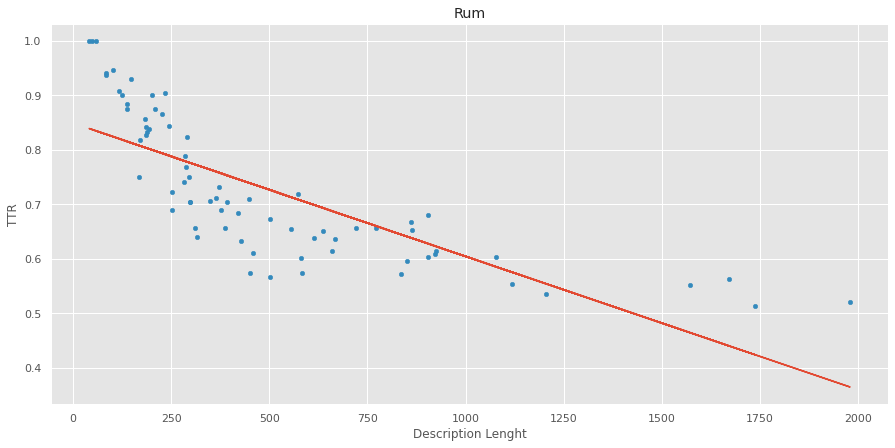

In [ ]:
x_whisky = whisky_df['DescriptionLenght']
y_whisky = whisky_df["TTR_WSw"]
x_rum = rum_df['DescriptionLenght']
y_rum = rum_df["TTR_WSw"]

# whisky
plt.style.use('ggplot')
whisky_df.plot(kind='scatter', x='DescriptionLenght', y='TTR_WSw', figsize=(15,7))
m, b = np.polyfit(x_whisky, y_whisky, 1)
plt.plot(x_whisky, m*x_whisky+b)
plt.title('Whisky')
plt.xlabel('Description Lenght')
plt.ylabel('TTR')

# rum
plt.style.use('ggplot')
rum_df.plot(kind='scatter', x='DescriptionLenght', y='TTR_WSw', figsize=(15,7))
m, b = np.polyfit(x_rum, y_rum, 1)
plt.plot(x_rum, m*x_rum+b)
plt.title('Rum')
plt.xlabel('Description Lenght')
plt.ylabel('TTR')

Calculate the correlation between description lenght and TTR.

In [ ]:
# calculate correlation
corr_whisky = np.corrcoef(whisky_df['DescriptionLenght'], whisky_df["TTR_WSw"])
corr_rum = np.corrcoef(rum_df['DescriptionLenght'], rum_df["TTR_WSw"])
print("Correlation whisky: " + str(corr_whisky[0,1]))
print("Correlation rum: " + str(corr_rum[0,1]))

Correlation whisky: -0.8284480232035225
Correlation rum: -0.7767724635882525


**Insights**
- The boxplot support the assumption, that Type-Token Ratio (TTR) for rum category description seems to be higher than the TTR for whisky descriptions. This means, that the vocabulary is more complex and have more variaty.
- Moreover according to the scatterplots and the correlation coefficient, the second assumption seems to be plausibel as well, that the TTR is higher in short description. But the effect gets smaller the longer the descriptions are.

## 5. Conclusion

**Recap of procedure**
1. Scrape description of categories of the two topics "Whisky" and "Rum" from Wikipedia using the wikipedia API.
2. Check the data quality and preprocess the data. This include data cleaning and the calculation of additional variables.
3. Exploratory data and text analyses. In an overview first remarks and assumptions are made. After that, different topics along these assumption are analysed with calculation and visualisations. After each chapter, insights are noted.
4. Conclusion.


**Most important insights**
- The most common words do not necessarily have to be highlighted in the wordcloud and vice versa.
- The most frequent bigrams are often origins (e.g. "united states") or types or brands of the spirits (e.g. "dark rum", "single malt").
- The polarity for both whisky and rum descriptions are close to 0.
- The whisky description are longer and their lenght varies more than the rum description.
- TTR is higher in short description. Considering the point above, the TTR is higher in rum description.

